In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# URLs for the datasets
url_jan_2020 = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-01.parquet"

# Load the datasets
df = pd.read_parquet(url_jan_2020)
# df = df.head(100000)
# Display the first few rows of each dataset
print("January 2020 Data:")
print(df.head())

January 2020 Data:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1         1  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2         1  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3         1  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4         2  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2         1.0                  N           238           239   
1            1.2         1.0                  N           239           238   
2            0.6         1.0                  N           238           238   
3            0.8         1.0                  N           238           151   
4            0.0         1.0                  N           193           193   

   payment_type  fare_amount  extra  mta_tax  tip_amoun

In [ ]:
df.isna().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,65441
trip_distance,0
RatecodeID,65441
store_and_fwd_flag,65441
PULocationID,0
DOLocationID,0
payment_type,0


In [ ]:
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)
df['store_and_fwd_flag'].fillna('N', inplace=True)  # Assuming 'N' (No) as default
df['congestion_surcharge'].fillna(0, inplace=True)  # Assuming 0 if not recorded
df.drop(columns=['airport_fee'], inplace=True)  # Drop column with too many NaNs

<ipython-input-4-7118aad86c57>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
<ipython-input-4-7118aad86c57>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2,2020-01-31 23:08:00,2020-01-31 23:34:00,1.0,12.07,1.0,N,191,35,0,52.18,2.75,0.5,0.00,0.00,0.3,55.73,0.0
6405004,2,2020-01-31 23:00:00,2020-01-31 23:44:00,1.0,23.48,1.0,N,186,117,0,54.01,2.75,0.5,0.00,6.12,0.3,63.68,0.0
6405005,2,2020-01-31 23:13:00,2020-01-31 23:38:00,1.0,12.09,1.0,N,164,131,0,38.02,2.75,0.5,0.00,6.12,0.3,47.69,0.0
6405006,2,2020-01-31 23:02:54,2020-01-31 23:27:10,1.0,11.65,1.0,N,10,16,0,28.74,2.75,0.0,0.00,0.00,0.3,31.79,0.0


In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds()

In [ ]:
#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data.
df['weekday'] = df.tpep_pickup_datetime.dt.day_name()
df['month'] = df.tpep_pickup_datetime.dt.month
df['weekday_num'] = df.tpep_pickup_datetime.dt.weekday
df['pickup_hour'] = df.tpep_pickup_datetime.dt.hour

In [ ]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,weekday,month,weekday_num,pickup_hour
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1,...,0.00,0.3,11.27,2.5,None,288.0,Wednesday,1,2,0
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1,...,0.00,0.3,12.30,2.5,None,445.0,Wednesday,1,2,0
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1,...,0.00,0.3,10.80,2.5,None,371.0,Wednesday,1,2,0
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1,...,0.00,0.3,8.16,0.0,None,291.0,Wednesday,1,2,0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2,...,0.00,0.3,4.80,0.0,None,138.0,Wednesday,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2,2020-01-31 23:08:00,2020-01-31 23:34:00,NaN,12.07,NaN,None,191,35,0,...,0.00,0.3,55.73,NaN,None,1560.0,Friday,1,4,23
6405004,2,2020-01-31 23:00:00,2020-01-31 23:44:00,NaN,23.48,NaN,None,186,117,0,...,6.12,0.3,63.68,NaN,None,2640.0,Friday,1,4,23
6405005,2,2020-01-31 23:13:00,2020-01-31 23:38:00,NaN,12.09,NaN,None,164,131,0,...,6.12,0.3,47.69,NaN,None,1500.0,Friday,1,4,23
6405006,2,2020-01-31 23:02:54,2020-01-31 23:27:10,NaN,11.65,NaN,None,10,16,0,...,0.00,0.3,31.79,NaN,None,1456.0,Friday,1,4,23


In [ ]:
dummy = pd.get_dummies(df.store_and_fwd_flag, prefix='flag')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.VendorID, prefix='VendorID')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.month, prefix='month')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.weekday_num, prefix='weekday_num')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.pickup_hour, prefix='pickup_hour')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

dummy = pd.get_dummies(df.passenger_count, prefix='passenger_count')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
df = pd.concat([df,dummy], axis = 1)

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour_23,passenger_count_1.0,passenger_count_2.0,passenger_count_3.0,passenger_count_4.0,passenger_count_5.0,passenger_count_6.0,passenger_count_7.0,passenger_count_8.0,passenger_count_9.0
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,...,False,True,False,False,False,False,False,False,False,False
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,...,False,True,False,False,False,False,False,False,False,False
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,...,False,True,False,False,False,False,False,False,False,False
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,...,False,True,False,False,False,False,False,False,False,False
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'trip_duration',
       'weekday', 'month', 'weekday_num', 'pickup_hour', 'flag_Y',
       'VendorID_2', 'VendorID_5', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_12', 'weekday_num_1', 'weekday_num_2',
       'weekday_num_3', 'weekday_num_4', 'weekday_num_5', 'weekday_num_6',
       'pickup_hour_1', 'pickup_hour_2', 'pickup_hour_3', 'pickup_hour_4',
       'pickup_hour_5', 'pickup_hour_6', 'pickup_hour_7', 'pickup_hour_8',
       'pickup_hour_9', 'pickup_hour_10', 'pickup_hour_11', 'pickup_hour_12',
       'pickup_hour_13', 'pickup_hour_14', 'pickup_hour_15', 'pickup_hour_16',
       'pickup_hour

**Passengers**

In [ ]:
pd.options.display.float_format = '{:.2f}'.format #To suppres scientific notation.
df.passenger_count.value_counts()

,count
passenger_count,
1.00,4547226
2.00,946423
3.00,250234
5.00,225693
6.00,132154
4.00,123470
0.00,114302
7.00,29
9.00,19


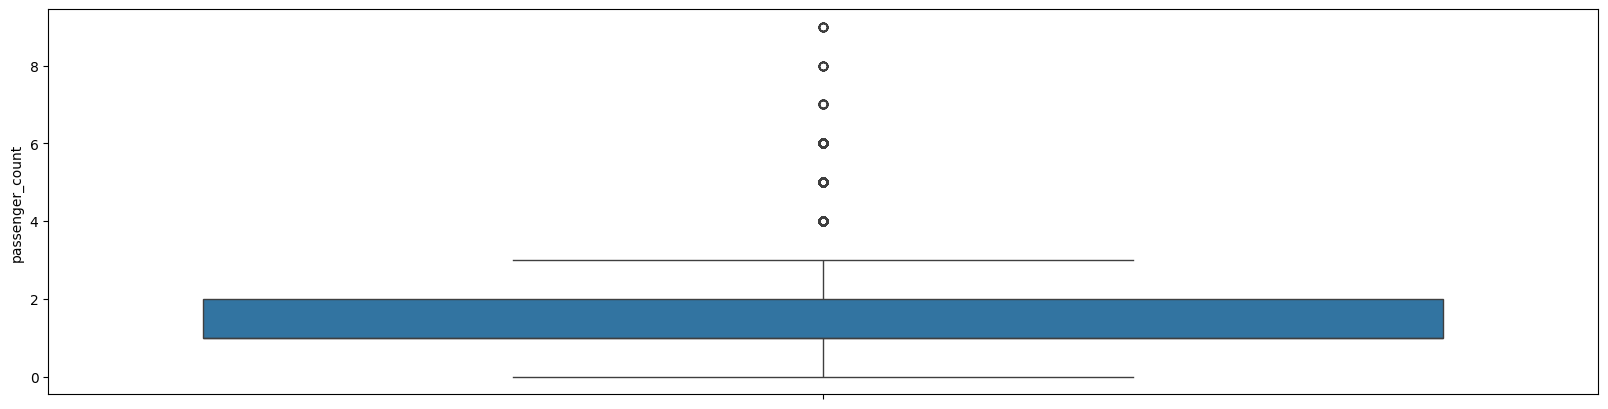

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(df.passenger_count)
plt.show()

Observations:

* There are some trips with 0 passenger count.
* Few trips consisted of even 7, 8 or 9 passengers. Clear outliers and pointers to data inconsistency
* Most of trip consist of passenger either 1 or 2.

Passenger count is a driver entered value. Since the trip is not possible without passengers. It is evident that the driver forgot to enter the value for the trips with 0 passenger count. Lets analyze the passenger count distribution further to make it consistent for further analysis

In [ ]:
df.passenger_count.describe()

,passenger_count
count,6339567.00
mean,1.52
std,1.15
min,0.00
25%,1.00
50%,1.00
75%,2.00
max,9.00


As per above details. Mean median and mode are all approx equal to 1. So we would replace the 0 passenger count with 1.

In [ ]:
df = df[df.passenger_count <= 6]

In [ ]:
df.passenger_count.value_counts()

,count
passenger_count,
1.00,4547226
2.00,946423
3.00,250234
5.00,225693
6.00,132154
4.00,123470
0.00,114302


In [ ]:
# sns.countplot(df.passenger_count)
# plt.show()

It is evident that most of the trips was taken by single passenger and that is inline with our day to day observations

**Vendors**

Here we analyze taxi data only for the 2 vendors which are listed as 1 and 2 in the datset

In [ ]:
# sns.countplot(df.VendorID)

Though both the vendors seems to have almost equal market share. But Vendor 2 is evidently more famous among the population as per the above graph.

**Distance**

In [ ]:
df.trip_distance.describe()

,trip_distance
count,6339502.00
mean,2.85
std,3.76
min,-22.18
25%,0.96
50%,1.60
75%,2.90
max,262.88


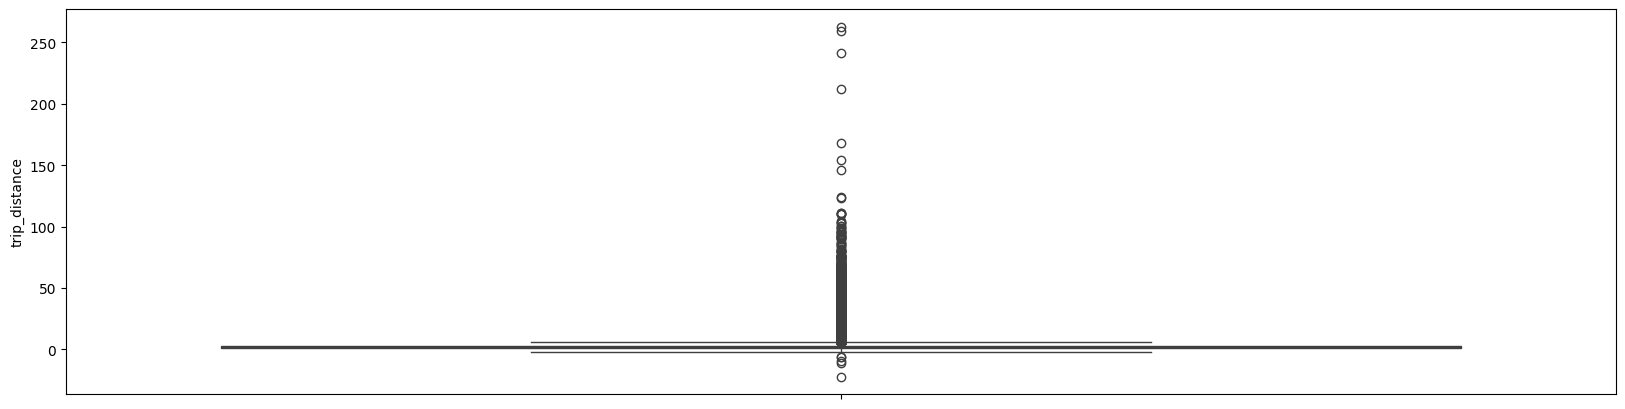

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(df.trip_distance)
plt.show()

Observations:

* There some trips with over 60 km distance.

* Some of the trips distance value is 0 km.

* Mean distance travelled is approx 3.35 kms.

In [ ]:
print("There are {} trip records with 0 km distance".format(df.trip_distance[df.trip_distance == 0 ].count()))

There are 67443 trip records with 0 km distance


In [ ]:
df[df.trip_distance == 0 ].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour_23,passenger_count_1.0,passenger_count_2.0,passenger_count_3.0,passenger_count_4.0,passenger_count_5.0,passenger_count_6.0,passenger_count_7.0,passenger_count_8.0,passenger_count_9.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.00,0.00,1.00,N,193,193,2,...,False,True,False,False,False,False,False,False,False,False
6,2,2020-01-01 00:39:25,2020-01-01 00:39:29,1.00,0.00,1.00,N,193,193,1,...,False,True,False,False,False,False,False,False,False,False
7,2,2019-12-18 15:27:49,2019-12-18 15:28:59,1.00,0.00,5.00,N,193,193,1,...,False,True,False,False,False,False,False,False,False,False
8,2,2019-12-18 15:30:35,2019-12-18 15:31:35,4.00,0.00,1.00,N,193,193,1,...,False,False,False,False,True,False,False,False,False,False
19,1,2020-01-01 00:25:39,2020-01-01 00:27:05,1.00,0.00,1.00,N,170,162,4,...,False,True,False,False,False,False,False,False,False,False


**Bivariate Analysis**

**Trip Duration per hour**

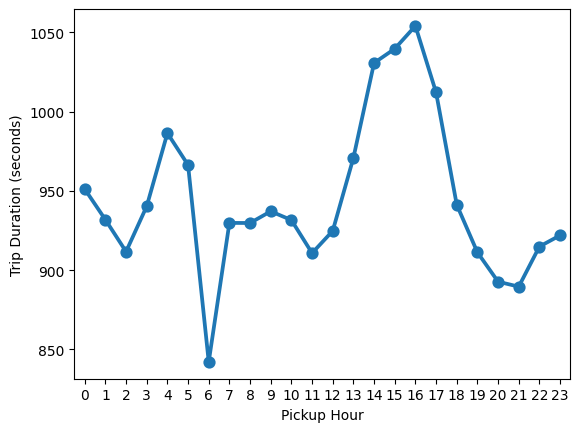

In [ ]:
group1 = df.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.show()

**Trip duration per weekday**

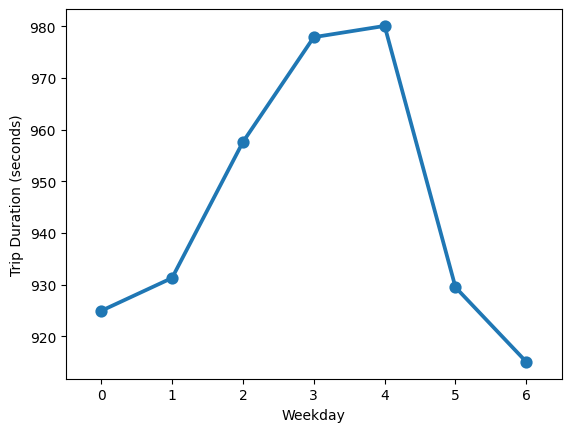

In [ ]:
group2 = df.groupby('weekday_num').trip_duration.mean()
sns.pointplot(group2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.show()

**Trip duration per month**

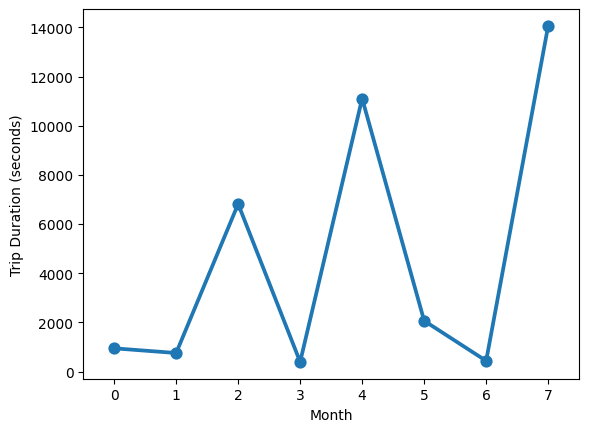

In [ ]:
group3 = df.groupby('month').trip_duration.mean()
sns.pointplot(group3.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')
plt.show()

**Trip duration per vendor**

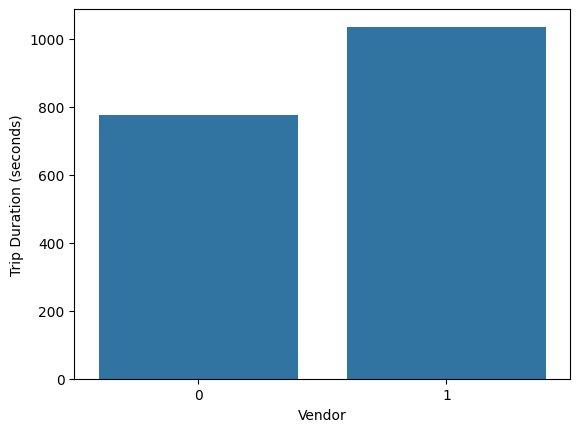

In [ ]:
group4 = df.groupby('VendorID').trip_duration.mean()
sns.barplot(group4.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.show()

**Trip duration v/s Flag**

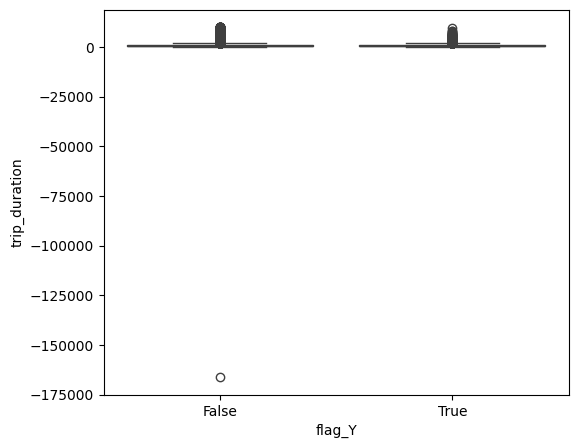

In [ ]:
plt.figure(figsize = (6,5))
plot_dur = df.loc[(df.trip_duration < 10000)]
sns.boxplot(x = "flag_Y", y = "trip_duration", data = plot_dur)
plt.show()

**Distance per hour**

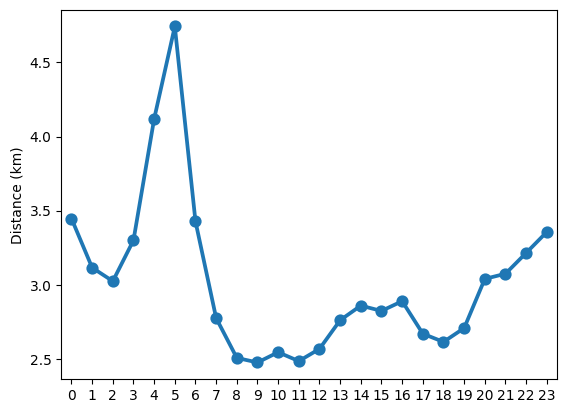

In [ ]:
group5 = df.groupby('pickup_hour').trip_distance.mean()
sns.pointplot(group5.values)
plt.ylabel('Distance (km)')
plt.show()

**Distance per weekday**

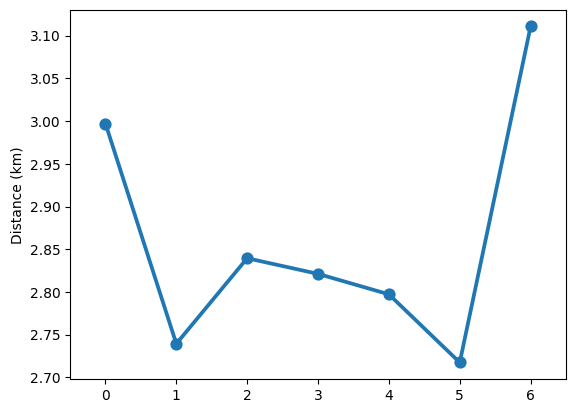

In [ ]:
group6 = df.groupby('weekday_num').trip_distance.mean()
sns.pointplot(group6.values)
plt.ylabel('Distance (km)')
plt.show()

**Distance per month**

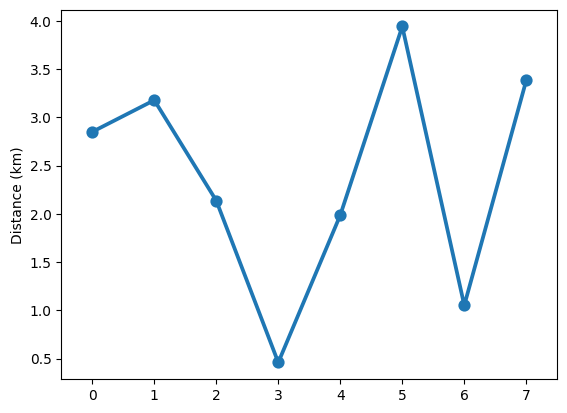

In [ ]:
group7 = df.groupby('month').trip_distance.mean()
sns.pointplot(group7.values)
plt.ylabel('Distance (km)')
plt.show()

**Distance per vendor**

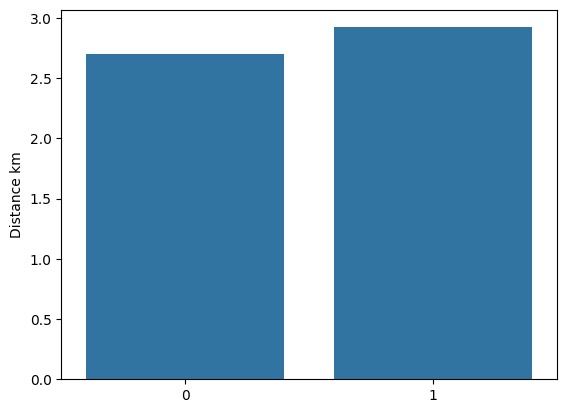

In [ ]:
group8 = df.groupby('VendorID').trip_distance.mean()
sns.barplot(group8.values)
plt.ylabel("Distance km")
plt.show()

**Distance v/s Flag**

In [ ]:
# plt.figure(figsize = (6,6))
# plot_dist = df.loc[(df.trip_distance < 100)]
# sns.boxplot(x = "flag_Y", y = "distance", data = plot_dist)
# plt.ylabel('Distance (km)')
# plt.show()

**Distance v/s Trip duration**

In [ ]:
# plt.scatter(df.trip_duration, df.distance , s=1, alpha=0.5)
# plt.ylabel('Distance')
# plt.xlabel('Trip Duration')
# plt.show()

**Passenger count per vendor**

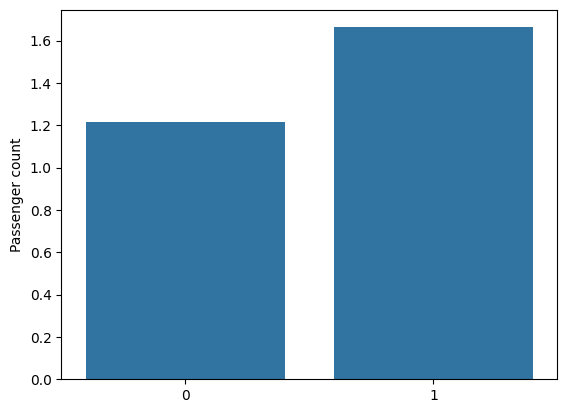

In [ ]:
group9 = df.groupby('VendorID').passenger_count.mean()
sns.barplot(group9.values)
plt.ylabel('Passenger count')
plt.show()

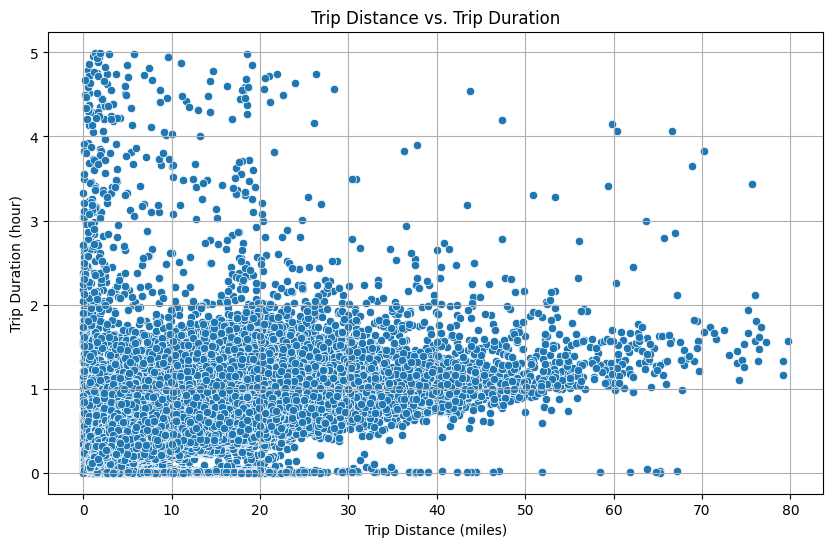

In [ ]:
# Set threshold for outliers (Example: trips longer than 1000s)
# outlier_threshold = 1000
# df["is_outlier"] = df["trip_duration"] > outlier_threshold

df["trip_duration_hr"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 3600

outlier_threshold = 30
df["is_outlier"] = df["trip_duration_hr"] > outlier_threshold

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df[(df["trip_duration_hr"] > 0) & (df["trip_duration_hr"] < 5) & (df["trip_distance"] > 0) & (df["trip_distance"] < 80)], x="trip_distance", y="trip_duration_hr")

plt.xlabel("Trip Distance (miles)")
plt.ylabel("Trip Duration (hour)")
plt.title("Trip Distance vs. Trip Duration")
# plt.legend(title="Outlier", labels=["Normal Trip", "Outlier"])
plt.grid(True)

# Save the figure as a high-quality PNG file
# plt.savefig("trip_distance_vs_duration.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()